# Problem 1

$ A = \begin{bmatrix} 1 & 2 \\ 5 & -2  \end{bmatrix}$

$ B = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 0 & 2  \end{bmatrix}$

Part 1

$ Trace(A) = 1 + (-2) = -1 $

Part 2 

$ BB^T = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 0 & 2  \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 0 & 0 \\ 0 & 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 2 & 8 \end{bmatrix} $

$Trace(BB^T) = 1 + 8 = 9$

# Problem 2

$A: n \times n \\$
$D: n \times n \\ $
$B: n \\$
$x^T(A + D) = b^T$

$(x^T(A + D))^T = (b^T)^T\\$
$(A+D)^Tx = b\\$
$(A+D)^{-1}(A+D)x = (A+D)^{-1}b \\$
$x = (A+D)^{-1}b \\$

# Problem 3

i ) $ n \times m$

ii ) not possible

# Problem 4

## Part 1


In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
def loadMusicData(fname, addBias=True):
   data = np.loadtxt(fname, delimiter=',')
   years = data[:, 0]
   feats = data[:, 1:]
   trainYears = years[:463714]
   trainFeat = feats[:463714]
   testYears = years[463714:]
   testFeat = feats[463714:]


   mean = np.mean(trainFeat, axis=0)
   std = np.std(trainFeat, axis=0)
   trainFeat = (trainFeat - mean) / std
   testFeat = (testFeat - mean) / std
   if addBias:
       trainFeat = np.hstack((trainFeat, np.ones((trainFeat.shape[0], 1))))
       testFeat = np.hstack((testFeat, np.ones((testFeat.shape[0], 1))))


   return trainYears, trainFeat, testYears, testFeat

In [3]:
def musicMSE(pred, gt):
   pred_rounded = np.round(pred)
   mse = np.mean((pred_rounded - gt) ** 2)
   return mse

In [4]:
y_train, X_train, y_test, X_test = loadMusicData('YearPredictionMSD.txt', addBias=True)

In [5]:
data = pd.read_csv('YearPredictionMSD.txt', header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [6]:
most_common_year = np.bincount(y_test.astype(int)).argmax()
test_mse = musicMSE(most_common_year, y_test)
print(test_mse)

190.08239236117836


The above cells show the defined functions required for the question. loadMusicData(fname, addBias) loads the dataset and splits it into training and testing features and labels. It then returns the trainYears, trainFeat, testYears, testFeat as NumPy arrays. 

The range of the variables in the dataset is quite large, with some features ranging from -100 to 100, while some other features range from -10,000 to 10,000. I did this by using pandas.describe(). 

To normalize the features, we can subtract the mean and divide by the standard deviation of each column. This is called standardizing the dataset and this will ensure that all the features have a similar scale and will allow the model to train with better performance. Another method of normalizing the dataset is by subtracting the minimum and dividing by the maximum, this will ensure the features range between 0 and 1. 

The dataset contains years ranging from 1922 to 2011. The median of the year is 2002, the lower quartile is 1994 and upper quartile is 2006. 

If the classifier always outputs the most common year in the dataset, the test mean squared error (MSE) will be the variance of the target variable. 

The test MSE in this case is 190.08239236117836. 

## Part 2

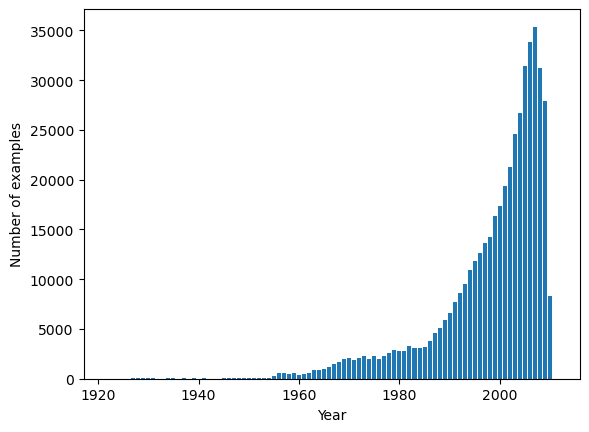

In [7]:
import matplotlib.pyplot as plt

unique_years, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_years, counts)
plt.xlabel('Year')
plt.ylabel('Number of examples')
plt.show()

The output shows that the counts of different years are not balanced. For some years, there are only a few records while the popular years have more than 10,000. This imbalanced distribution of examples could cause problems for a classification model, especially if we don't have enough examples for some years to train the model properly.

Another issue with treating this problem as a classification problem is that the years are continuous and related to one another, as the difference between consecutive years is not necessarily the same. For example, the difference between 1999 and 2000 is only 1 year, while the difference between the years 1999 and 2009 is 10 years. This can cause problems for a classification model as it can be hard for the model to learn the underlying differences between the different categories. 

Therefore, treating this problem as a regression problem is a more appropriate approach because treating the year as a continuous variable can lead to better results for the model. This allows us to take into account the differences between consecutive years and the variation in the number of examples for each year.

## Part 3 - 5
Creating a function to perform mini batch stochastic gradient descent using L2 and L1 regularization with MSE loss and MAE loss

In [8]:
def lossfn(y_pred, y, type):
    if type == 'mse':
        return np.mean((np.round(y_pred) - y)**2)
    if type == 'mae':
        return np.mean(np.abs(np.round(y_pred) - y))
    if type == 'mse_loss':
        return np.sum(((np.round(y_pred) - y)**2))

def regfn(w, alpha, type):
    if type == 'l1':
        return alpha*np.sum(np.abs(w))
    if type == 'l2':
        return alpha*np.sum(w**2)

In [9]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, batch_size, learning_rate, num_epochs, reg=None, alpha=0.01, loss='mse', countreg=False, verbose=True):
    # Initialize the weights randomly
    np.random.seed(1)
    w = np.random.randn(X_train.shape[1])

    # Track the training and testing losses over time
    train_losses = []
    test_losses = []
    train_mses = []
    test_mses = []

    # Loop over the epochs
    for epoch in range(num_epochs+1):
        # Loop over the minibatches
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            # Compute the predictions and the error
            if countreg:
                y_pred = np.exp(X_batch.dot(w))
                error = np.round(y_pred) - y_batch
            else:
                y_pred = X_batch.dot(w)
                error = y_pred - y_batch

            # Compute the gradient of the loss function
            if loss == 'mse':
                dL_dw = (2/batch_size) * X_batch.T.dot(error)
            elif loss == 'mae':
                dL_dw = (1/batch_size) * X_batch.T.dot(np.sign(error))
            else:
                raise ValueError(f"Invalid loss function: {loss}")

            if reg == 'l1':
                dR_dw = alpha * np.sign(w)
            elif reg == 'l2':
                dR_dw = alpha * w

            else:
                dR_dw = 0

            # Add the regularization gradient to the loss gradient
            dL_dw += dR_dw

            # Update the weights using the gradient and the learning rate
            w -= learning_rate * dL_dw

        # Evaluate the training and testing losses after each epoch
        if countreg:
            train_mse = lossfn(np.log(X_train.dot(w) + 1), y_train, loss)
            test_mse = lossfn(np.log(X_test.dot(w) + 1), y_test, loss)
            train_loss = lossfn(np.log(X_test.dot(w) + 1), y_test, 'mse_loss') 
            test_loss = lossfn(np.log(X_test.dot(w) + 1), y_test, 'mse_loss')
        else:
            train_mse = lossfn(X_train.dot(w), y_train, loss)
            test_mse = lossfn(X_test.dot(w), y_test, loss)
            train_loss = lossfn(X_train.dot(w), y_train, 'mse_loss') + regfn(w, alpha, reg)
            test_loss = lossfn(X_test.dot(w), y_test, 'mse_loss') + regfn(w, alpha, reg)


        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_mses.append(train_mse)
        test_mses.append(test_mse)

        if verbose:
            if epoch % 5 == 0:
                print("Epoch: {}, Training Loss: {}, Training MSE: {}, Test Loss: {}, Test MSE: {}".format(epoch, train_loss, train_mse, test_loss, test_mse))

    return w, train_losses, test_losses, train_mses, test_mses


Computing optimal weights using stochastic gradient descent using L2 regression

In [10]:
w_l2, trainloss_l2, testloss_l2, trainmse_l2, testmse_l2 = stochastic_gradient_descent(X_train, y_train, X_test, y_test, 30, 0.00001, 100, 'l2', alpha=0.00001, loss='mse', verbose=True)

Epoch: 0, Training Loss: 996741752132.8346, Training MSE: 2149475.219920037, Test Loss: 110966070164.83463, Test MSE: 2149214.0412155488
Epoch: 5, Training Loss: 45318971404.42417, Training MSE: 97730.43594974489, Test Loss: 5046040002.42417, Test MSE: 97732.75694834499
Epoch: 10, Training Loss: 2100822684.3184495, Training MSE: 4530.427476849955, Test Loss: 234059042.31844956, Test MSE: 4533.3037322538785
Epoch: 15, Training Loss: 136800408.37028566, Training MSE: 295.0102196612567, Test Loss: 15230482.370285667, Test MSE: 294.98640351726675
Epoch: 20, Training Loss: 47177866.81469218, Training MSE: 101.73906114544741, Test Loss: 5222711.814692178, Test MSE: 101.15380294784141
Epoch: 25, Training Loss: 42910845.90974683, Training MSE: 92.53722337475254, Test Loss: 4741086.90974683, Test MSE: 91.82558927775949
Epoch: 30, Training Loss: 42601282.930036716, Training MSE: 91.86965025856455, Test Loss: 4705510.930036718, Test MSE: 91.13654587360307
Epoch: 35, Training Loss: 42523958.934375

Computing optimal weights using pseudoinverse

In [11]:
def pinv(X_train, y_train, X_test, y_test, alpha=0.0001):
    pseudoinv = np.dot(np.linalg.inv(X_train.T.dot(X_train) + alpha*np.eye(X_train.shape[1])), X_train.T)
    w = np.dot(pseudoinv, y_train)
    
    y_pred_train = np.dot(X_train, w)
    y_pred_test = np.dot(X_test, w)

    trainloss= lossfn(y_train, y_pred_train, type='mse')
    testloss= lossfn(y_test, y_pred_test, type='mse')
  
    print(f'Train loss: {trainloss:.4f}, Test loss: {testloss:.4f}')
    
    return w, trainloss, testloss

In [12]:
w_pinv, trainloss, testloss = pinv(X_train, y_train, X_test, y_test)

Train loss: 91.2564, Test loss: 90.4434


Computing optimal weights using stochastic gradient descent using L1 regression with MAE error

In [13]:
w_l1_mae, trainloss_l1mae, testloss_l1mae, testmae_l1, testmae_l1 = stochastic_gradient_descent(X_train, y_train, X_test, y_test, 32, 0.007, 100, 'l1', alpha=0.0001, loss='mae')

Epoch: 0, Training Loss: 1666620025122.0168, Training MSE: 1895.7601668269667, Test Loss: 185597349128.0168, Test MSE: 1895.923224419438
Epoch: 5, Training Loss: 894242382748.0671, Training MSE: 1388.6243934839147, Test Loss: 99590761804.06714, Test MSE: 1388.789486936143
Epoch: 10, Training Loss: 360385565052.1175, Training MSE: 881.4868000534813, Test Loss: 40140979248.11748, Test MSE: 881.6489705796905
Epoch: 15, Training Loss: 65053232942.16784, Training MSE: 374.3505997231052, Test Loss: 7249433698.167835, Test MSE: 374.51135945459123
Epoch: 20, Training Loss: 45161721.20314135, Training MSE: 6.518373393945406, Test Loss: 4958681.203141343, Test MSE: 6.535356665569135
Epoch: 25, Training Loss: 45062710.20326853, Training MSE: 6.512285589824763, Test Loss: 4942417.203268526, Test MSE: 6.525750033894366
Epoch: 30, Training Loss: 45056695.203271665, Training MSE: 6.512460266457342, Test Loss: 4942097.203271664, Test MSE: 6.525943715984583
Epoch: 35, Training Loss: 45064556.20326789, 

In [14]:
w_l1_mse, trainloss_l1mse, testloss_l1mse, trainmse_l1, testmse_l1 = stochastic_gradient_descent(X_train, y_train, X_test, y_test, 32, 0.00001, 100, 'l1', alpha=0.00001, loss='mse')

Epoch: 0, Training Loss: 1036007889814.0056, Training MSE: 2234152.7101057977, Test Loss: 115339833116.00568, Test MSE: 2233925.9963200404
Epoch: 5, Training Loss: 57131872903.0169, Training MSE: 123204.97742789736, Test Loss: 6361256644.016896, Test MSE: 123206.1483217447
Epoch: 10, Training Loss: 3189740673.0194974, Training MSE: 6878.680982243365, Test Loss: 355351917.0194973, Test MSE: 6882.530204721969
Epoch: 15, Training Loss: 216716682.02011183, Training MSE: 467.3498794515585, Test Loss: 24148993.02011184, Test MSE: 467.7227440878542
Epoch: 20, Training Loss: 52534257.020266704, Training MSE: 113.29021120777031, Test Loss: 5823879.020266706, Test MSE: 112.79810578915767
Epoch: 25, Training Loss: 43286530.020308964, Training MSE: 93.34747279573185, Test Loss: 4784050.020308965, Test MSE: 92.65848037032016
Epoch: 30, Training Loss: 42662255.02032232, Training MSE: 92.00122273642806, Test Loss: 4711032.020322325, Test MSE: 91.2442524839728
Epoch: 35, Training Loss: 42549647.020328

Attempt at calculating weights using count regression

In [15]:
w_count, trainloss_count, testloss_count, trainmse_count, testmse_count = stochastic_gradient_descent(X_train, y_train, X_test, y_test, 32, 0.001, 100, 'l2', alpha=0.001, loss='mse', countreg=True)

/var/folders/37/w6bjpkks3svb7gs5s6x3sldm0000gn/T/ipykernel_27091/3160831673.py:21: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(X_batch.dot(w))


Epoch: 0, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 5, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 10, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 15, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 20, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 25, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 30, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 35, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 40, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 45, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 50, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 55, Training Loss: nan, Training MSE: nan, Test Loss: nan, Test MSE: nan
Epoch: 60, Training Loss: nan, Training MS

In [16]:
import matplotlib.pyplot as plt

## Part 6 Comparing Models 

Plots of histograms of weights using L2 and L1 regression 

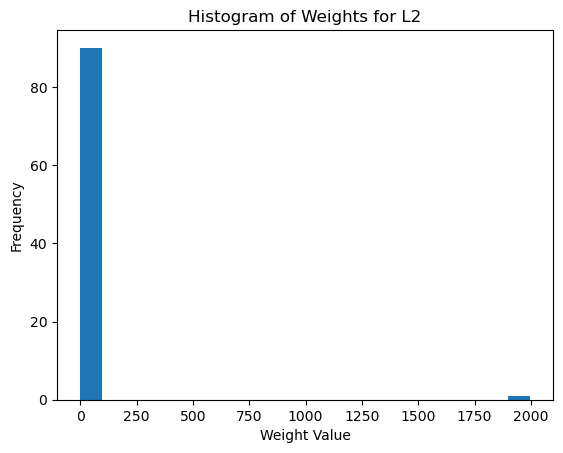

In [17]:
plt.hist(w_l2, bins=20)
plt.title('Histogram of Weights for L2')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

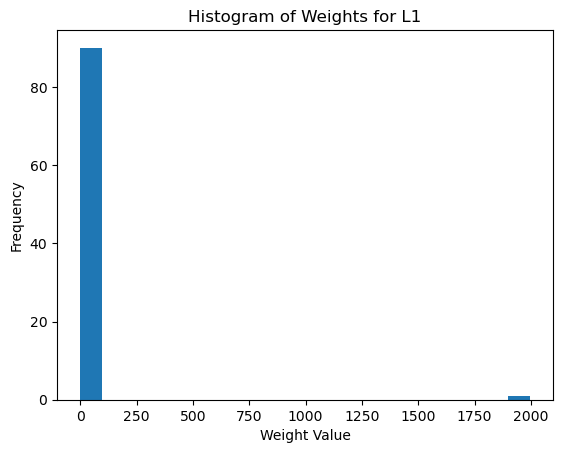

In [18]:
plt.hist(w_l1_mse, bins=20)
plt.title('Histogram of Weights for L1')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

From the histogram of weights, the weights for L1 and L2 regression do not differ and are very similar.

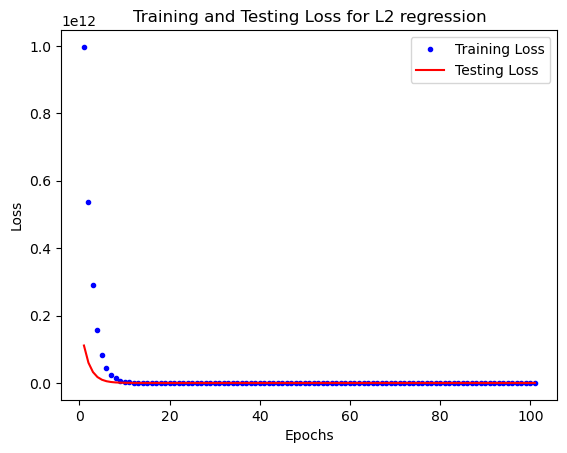

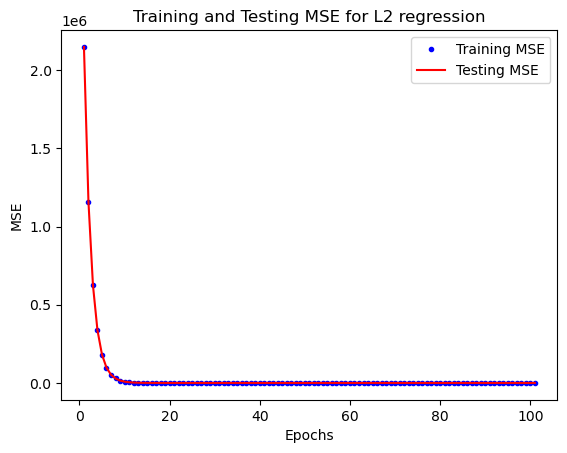

In [19]:
import matplotlib.pyplot as plt

# assume that you have a list of training loss values called 'train_loss' 
# and a list of testing loss values called 'test_loss'
epochs = range(1, len(trainloss_l2)+1)
plt.plot(epochs, trainloss_l2, 'b.', label='Training Loss')
plt.plot(epochs, testloss_l2, 'r', label='Testing Loss')
plt.title('Training and Testing Loss for L2 regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, trainmse_l2, 'b.', label='Training MSE')
plt.plot(epochs, testmse_l2, 'r', label='Testing MSE')
plt.title('Training and Testing MSE for L2 regression')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

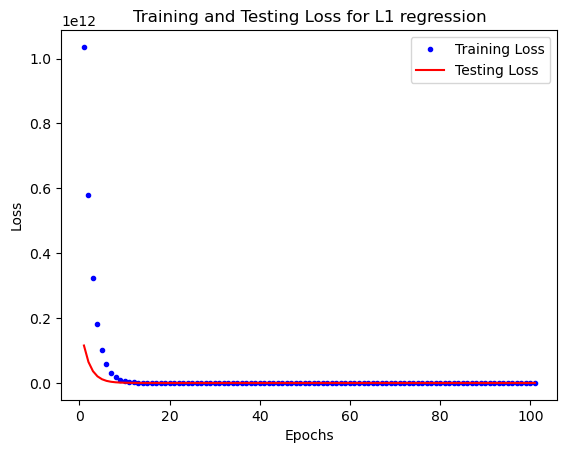

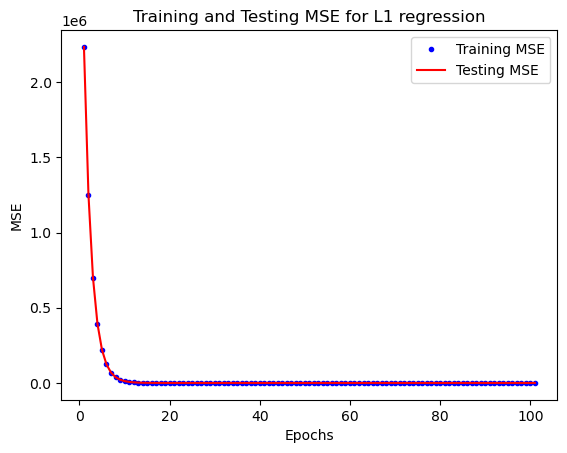

In [20]:
import matplotlib.pyplot as plt

# assume that you have a list of training loss values called 'train_loss' 
# and a list of testing loss values called 'test_loss'
plt.figure()
epochs = range(1, len(trainloss_l2)+1)
plt.plot(epochs, trainloss_l1mse, 'b.', label='Training Loss')
plt.plot(epochs, testloss_l1mse, 'r', label='Testing Loss')
plt.title('Training and Testing Loss for L1 regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, trainmse_l1, 'b.', label='Training MSE')
plt.plot(epochs, testmse_l1, 'r', label='Testing MSE')
plt.title('Training and Testing MSE for L1 regression')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [21]:
print('the final test loss for l2 regression:', testloss_l2[-1],'\nthe final test loss for l1 regression', testloss_l1mse[-1])
print('the best test loss for l2 regression:', np.min(testloss_l2),'\nthe best test loss for l1 regression', np.min(testloss_l1mse))
print('the final test MSE for l2 regression:', testmse_l2[-1],'\nthe final test MSE for l1 regression', testmse_l1[-1])
print('the best test MSE for l2 regression:', np.min(testmse_l2),'\nthe best test MSE for l1 regression', np.min(testmse_l1))

the final test loss for l2 regression: 4675266.9356257245 
the final test loss for l1 regression 4676348.02034666
the best test loss for l2 regression: 4675266.9356257245 
the best test loss for l1 regression 4676289.020346595
the final test MSE for l2 regression: 90.55077375995042 
the final test MSE for l1 regression 90.57248552226376
the best test MSE for l2 regression: 90.55077375995042 
the best test MSE for l1 regression 90.57134279793148


In [22]:
#Evaluate model L2
periods = [(1920, 1940), (1940, 1960), (1960, 1980), (1980, 2000), (2000, 2020)]
mses_l2 = []
losses_l2 = []

for period in periods:
    train_mask = (y_train >= period[0]) & (y_train < period[1])
    test_mask = (y_test >= period[0]) & (y_test < period[1])
    X_train_period, y_train_period = X_train[train_mask], y_train[train_mask]
    X_test_period, y_test_period = X_test[test_mask], y_test[test_mask]

    w, train_losses, test_losses, train_mses, test_mses = stochastic_gradient_descent(X_train_period, y_train_period, X_test_period, y_test_period, 32, 0.00001, 100, 'l2', alpha=0.00001, loss='mse', verbose=False)
    
    mses_l2.append(test_mses[-1])
    losses_l2.append(test_losses[-1])

In [23]:
#Evaluate model L1
periods = [(1920, 1940), (1940, 1960), (1960, 1980), (1980, 2000), (2000, 2020)]
mses_l1 = []
losses_l1 = []

for period in periods:
    train_mask = (y_train >= period[0]) & (y_train < period[1])
    test_mask = (y_test >= period[0]) & (y_test < period[1])
    X_train_period, y_train_period = X_train[train_mask], y_train[train_mask]
    X_test_period, y_test_period = X_test[test_mask], y_test[test_mask]

    w, train_losses, test_losses, train_mses, test_mses = stochastic_gradient_descent(X_train_period, y_train_period, X_test_period, y_test_period, 32, 0.0001, 100, 'l1', alpha=0.0001, loss='mse', verbose=False)
    
    mses_l1.append(test_mses[-1])
    losses_l1.append(test_losses[-1])

In [24]:
for i in range(len(mses_l1)):
    print("L1: Period:", periods[i], "MSE:", mses_l1[i], "Loss:", losses_l1[i])
    print("L2: Period:", periods[i], "MSE:", mses_l2[i], "Loss:", losses_l2[i])

L1: Period: (1920, 1940) MSE: 135573.9090909091 Loss: 4473939.217544776
L2: Period: (1920, 1940) MSE: 573997.5454545454 Loss: 18941919.3215184
L1: Period: (1940, 1960) MSE: 259825.35714285713 Loss: 87301320.46345697
L2: Period: (1940, 1960) MSE: 875874.1696428572 Loss: 294293722.65289414
L1: Period: (1960, 1980) MSE: 948.35569904548 Loss: 3378043.249762222
L2: Period: (1960, 1980) MSE: 216142.07215047727 Loss: 769898078.1731248
L1: Period: (1980, 2000) MSE: 22.398724748227163 Loss: 375873.20119363855
L2: Period: (1980, 2000) MSE: 774.0070317621119 Loss: 12988651.063215308
L1: Period: (2000, 2020) MSE: 7.626249231863903 Loss: 235796.20103994373
L2: Period: (2000, 2020) MSE: 62.05359164267926 Loss: 1918675.083511253


As seen in the results, L1 regression achieves much better results in terms of minimizing Test MSE and Loss over all time periods.

The test loss for L2 regression is very high for periods 1920 - 1940, 1940 - 1960, and 1960 - 1980, whereas for L1, it is only high for 1920 - 1940 and 1940 - 1960 and relatively low for all other time periods. 

I think in theory, L1 regression sets many of the weights to 0 while L2 regression produces smoother weight vectors. This is because the regularization term for L1 encourages sparsity while L2 just lowers the magnitude but not to 0. In terms of performance of the models, L1 performs better in this case because there could be irrelevant features in the data. L2 performs better in cases where there are multicollinearity among features. 

In theory I think regularization helps for L1 and L2 regression whereas regularization doesn't help for count regression but I can't prove it for count regression because I'm not sure how to make stochastic gradient descent work for count regression. 

# Problem 5

## Part 1

$ softmax(a) = \frac{exp(a)}{\sum^K_{j=1}exp(a_j)}$

Show that the softmax function is invariant to constant offsets to its input, i.e., softmax (a + c1) = softmax (a) ,
where c ∈ R is some constant and 1 denotes a column vector of 1’s.

$ softmax(a+c1) = \frac{exp(a+c1)}{\sum^K_{j=1}exp(a_j + c1)}$

using $ exp(x+y) = exp(x)exp(y)$
 
$ softmax(a+c1) = \frac{exp(a)exp(c1)}{\sum^K_{j=1}exp(a_j)exp(c1)}$

$ softmax(a+c1) = \frac{exp(a)exp(c1)}{exp(c1)\sum^K_{j=1}exp(a_j)} = \frac{exp(a)}{\sum^K_{j=1}exp(a_j)} = softmax(a)$  as required

## Part 2

The observation that the softmax function is invariant to constant offsets to its input is important when implementing it in a neural network because it means adding or substracting a constant value from the input does not change the output of softmax function. This means the neural network can generalize to new data which can improve reliability and accuracy.

In practice, the exponential function used in the softmax function can result in numerical overflow or underflow when the input values are large or small. This can cause the function to return NaN or inaccurate results. By subtracting a constant value from the input, we can shift the values closer to zero, which can improve numerical stability and reduce the chances of overflow or underflow.

Also it is common to use a bias terms in neural networks which is a constant offset that is added to the input. By using the invariance property of the softmax function, we can include this bias term in the input without affecting the output.





# Problem 6

## Part 1

In [55]:
def iris_data(train, test, addBias=False):
    train = np.loadtxt(train)
    test = np.loadtxt(test)

    X_train = train[:, 1:]
    y_train = train[:, 0].astype(int) - 1
    y_train_enc = pd.get_dummies(y_train).to_numpy()

    X_test = test[:, 1:]
    y_test = test[:, 0].astype(int) - 1
    y_test_enc = pd.get_dummies(y_test).to_numpy()

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std 
    X_test = (X_test - mean) / std
    if addBias:
        X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
        X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test, y_train_enc, y_test_enc

In [56]:
X_train, y_train, X_test, y_test, y_train_enc, y_test_enc = iris_data('iris-train.txt', 'iris-test.txt', addBias=False)

In [57]:
def predict_proba(X, W, b):
    logits = X @ W + b
    maxlogits = np.max(logits, axis=1, keepdims=True)
    logits = logits - maxlogits
    e_x = np.exp(logits)
    probs = e_x / np.sum(e_x, axis=1, keepdims=True)
    return probs

def L2_regularization(W, lambd):
    return 0.5 * lambd * np.sum(W**2)

def cross_entropy_loss(y_pred, y_true):
    eps = 1e-15
    loss = -np.mean(np.log(y_pred + eps) * y_true)
    return loss

def predict(X, W, b):
    labels = np.argmax(X @ W + b, axis=1)
    return labels

def accuracy(X, y, W, b):
    y_pred = predict(X, W, b)
    return np.mean(np.equal(y, y_pred))

def softmax_classifier(X_train, y_train, X_test, y_test, y_train_enc, y_test_enc, num_epochs=1000, batch_size=10,\
                        learning_rate = 0.05, momentum = 0.9, weight_decay = 0.001, verbose=False):

    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
  
    n_features = X_train.shape[1]
    n_classes = len(y_train_enc[0])
    W = np.random.randn(n_features, n_classes)
    b = np.zeros((1, n_classes))

    # Initialize momentum
    vW = np.zeros_like(W)
    vb = np.zeros_like(b)

    # Train the model
    for epoch in range(num_epochs+1):
        # Shuffle training data
        indices = np.random.permutation(X_train.shape[0])
        X_train = X_train[indices]
        y_train = y_train[indices]
        y_train_enc = y_train_enc[indices]

        # Mini-batch training
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train_enc[i:i+batch_size]

            y_pred = predict_proba(X_batch, W, b)

            # Compute gradients
            dW = (X_batch.T @ (y_pred - y_batch)) / batch_size + weight_decay * W
            db = np.sum(y_pred - y_batch, axis = 0, keepdims=True)

            #momentum
            vW = momentum * vW + (1 - momentum) * dW
            vb = momentum * vb + (1 - momentum) * db

            # Update weights and bias using momentum
            W = W - learning_rate * vW
            b = b - learning_rate * vb
        
        # compute losses and accuracies
        train_loss = cross_entropy_loss(y_train_enc, predict_proba(X_train, W, b)) + L2_regularization(W, weight_decay)
        test_loss = cross_entropy_loss(y_test_enc, predict_proba(X_test, W, b)) + L2_regularization(W, weight_decay)
        train_acc = accuracy(X_train, y_train, W, b)
        test_acc = accuracy(X_test, y_test, W, b)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        if verbose:
            if epoch % 5 == 0:
                print("Epoch: {}, Train Loss: {}, Train Acc: {}, Test Loss: {}, Test Acc: {}".format(epoch, train_loss, train_acc, test_loss, test_acc))
    
    y_train_pred = predict(X_train, W, b)
    y_test_pred = predict(X_test, W, b)
    
    return train_losses, test_losses, train_accs, test_accs, y_train_pred, y_test_pred, W, b
    

In [58]:
trainloss, testloss, trainacc, testacc, ypred_train, ypred_test, W, b = \
    softmax_classifier(X_train, y_train, X_test, y_test, y_train_enc, y_test_enc)

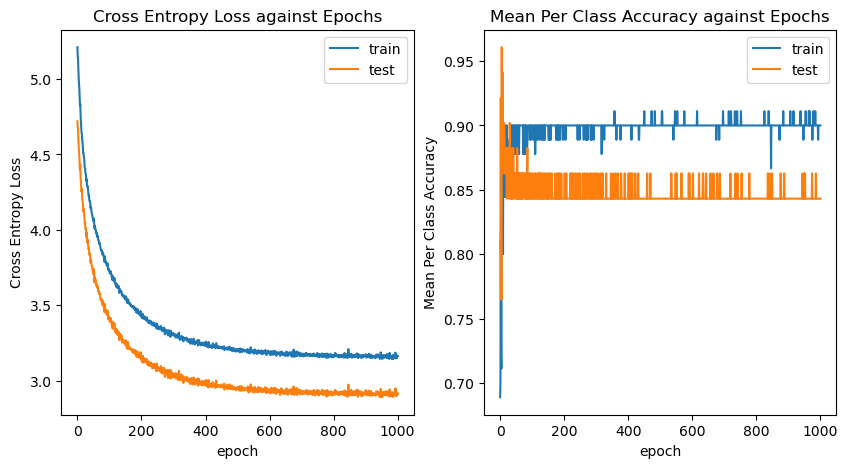

In [59]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot training and test loss on left subplot
ax1.set_title("Cross Entropy Loss against Epochs")
ax1.plot(trainloss, label='train')
ax1.plot(testloss, label='test')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Cross Entropy Loss')
ax1.legend()

# Plot training and test accuracy on right subplot
ax2.set_title("Mean Per Class Accuracy against Epochs")
ax2.plot(trainacc, label='train')
ax2.plot(testacc, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Mean Per Class Accuracy')
ax2.legend()

# Show plot
plt.show()

In [60]:
print('Best test accuracy', np.max(testacc))
print('Best train accuracy', np.max(trainacc))
print('Final test accuracy', testacc[-1])
print('Final train accuracy', trainacc[-1])

Best test accuracy 0.9607843137254902
Best train accuracy 0.9111111111111111
Final test accuracy 0.8431372549019608
Final train accuracy 0.9


What is the best test accuracy your model achieved? 
- Best test accuracy that the model has achieved is 96%

What hyperparameters did you use?

- learning_rate = 0.05
- num_epochs = 1000
- batch_size = 10
- momentum = 0.05
- weight_decay = 0.001

Would early stopping have helped improve accuracy on the test data? 
- Early stopping would have helped improve accuracy on the test data because as seen on the graph on the right of test and train accuracies over epochs, the testing accuracy reaches its peak of 96% after ~10 epochs of training the model, this could be an anomaly as there are not many test samples but it can be seen that it is trending downwards after the peak. Therefore, this can suggest that the model is overfitting to the training data, resulting in worse performance when it comes to testing data after 1000 epochs.

# Part 2

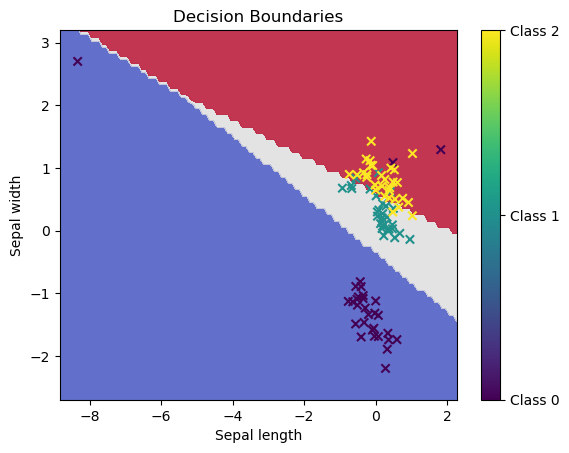

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid of points over feature space
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute class probabilities for each point on grid
probas = predict_proba(grid, W, b)
Z = np.argmax(probas, axis=1)

# Reshape predictions to match grid shape
Z = Z.reshape(xx.shape)

# Define color map for decision boundary
cmap = plt.cm.get_cmap('coolwarm', 3)

# Plot decision boundaries and training data
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap, levels=[-0.5, 0.5, 1.5, 2.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=1, marker='x')

# Add color bar and labels for classes
cbar = plt.colorbar()
cbar.set_ticks(np.unique(y_train))
cbar.set_ticklabels(['Class %d' % i for i in np.unique(y_train)])

# Set x and y limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
# Show plot
plt.show()


# Problem 7

In [62]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
X_train, y_train = trainset.data.reshape((50000, -1)), trainset.targets
X_test, y_test = testset.data.reshape((10000, -1)), testset.targets
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = (X_train - np.mean(X_train, axis=0)) / 255.
X_test = (X_test - np.mean(X_test, axis=0)) / 255.

In [64]:
y_train_enc = np.eye(10)[y_train]
y_test_enc = np.eye(10)[y_test]

In [67]:
train_losses, test_losses, train_accs, test_accs, y_train_pred, y_test_pred, W, b = \
    softmax_classifier(X_train, y_train, X_test, y_test, y_train_enc, y_test_enc, learning_rate=0.01, num_epochs=500, batch_size=100, verbose=True)

Epoch: 0, Train Loss: 17.961105147166414, Train Acc: 0.18026, Test Loss: 17.95921834572019, Test Acc: 0.1778
Epoch: 5, Train Loss: 16.8661334358191, Train Acc: 0.22874, Test Loss: 16.872953160000858, Test Acc: 0.2254
Epoch: 10, Train Loss: 15.97800981879767, Train Acc: 0.24566, Test Loss: 15.987005736700912, Test Acc: 0.2407
Epoch: 15, Train Loss: 15.179632133487901, Train Acc: 0.2542, Test Loss: 15.18690156633582, Test Acc: 0.2512
Epoch: 20, Train Loss: 14.437526396412853, Train Acc: 0.2628, Test Loss: 14.441528256145004, Test Acc: 0.2604
Epoch: 25, Train Loss: 13.748356320868059, Train Acc: 0.26956, Test Loss: 13.74957366770446, Test Acc: 0.2706
Epoch: 30, Train Loss: 13.110065741200408, Train Acc: 0.27502, Test Loss: 13.113649778336287, Test Acc: 0.2725
Epoch: 35, Train Loss: 12.515174560492746, Train Acc: 0.27876, Test Loss: 12.521077326258998, Test Acc: 0.276
Epoch: 40, Train Loss: 11.950587603939065, Train Acc: 0.28302, Test Loss: 11.957926597171447, Test Acc: 0.2818
Epoch: 45, T

Hyperparameters used:
- learning rate: 0.01
- batch size: 100
- epochs: 500
- weight decay: 0.001
- momentum: 0.9

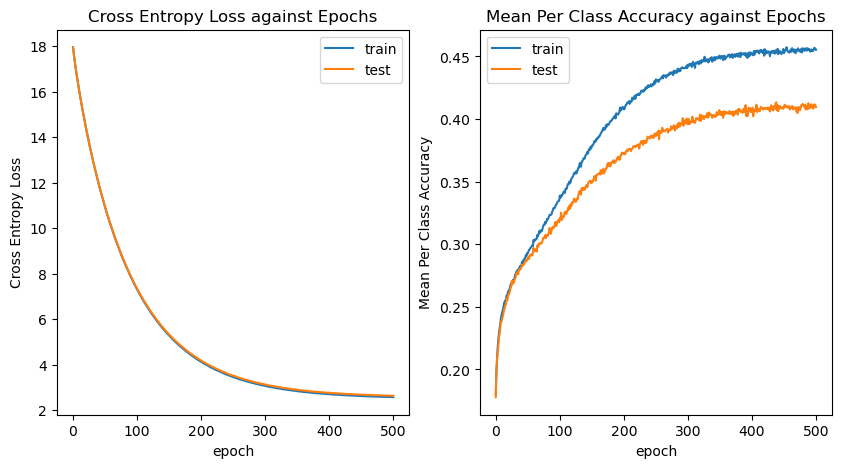

In [68]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot training and test loss on left subplot
ax1.set_title("Cross Entropy Loss against Epochs")
ax1.plot(train_losses, label='train')
ax1.plot(test_losses, label='test')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Cross Entropy Loss')
ax1.legend()

# Plot training and test accuracy on right subplot
ax2.set_title("Mean Per Class Accuracy against Epochs")
ax2.plot(train_accs, label='train')
ax2.plot(test_accs, label='test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Mean Per Class Accuracy')
ax2.legend()

# Show plot
plt.show()

In [81]:
print('Best test accuracy', np.max(test_accs))
print('Final test accuracy', test_accs[-1])

Best test accuracy 0.4134
Final test accuracy 0.4096


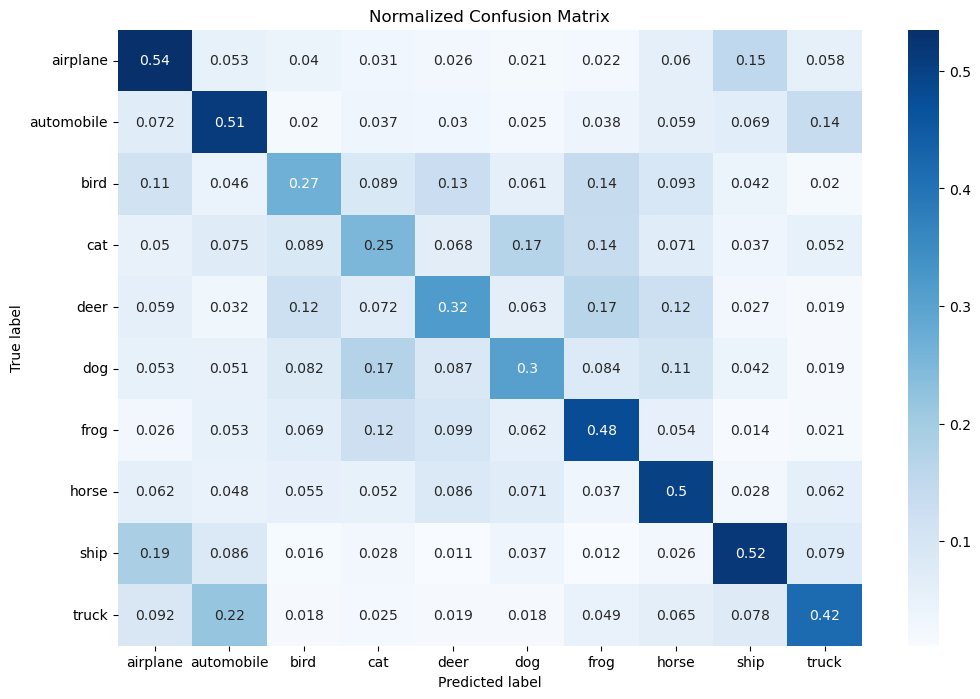

In [80]:
import seaborn as seaborn
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_test_pred, normalize = 'true')
categories= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
df_cm = pd.DataFrame(cmatrix ,index = categories, columns = categories)
plt.figure(figsize = (12,8))
ax = plt.axes()
seaborn.heatmap(df_cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title('Normalized Confusion Matrix')
plt.show()
     